In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy import optimize
from scipy.special import gamma, loggamma
from scipy.stats import beta 

In [2]:
# find c minimizing this 
def objective(a, b, c):
    # kumaraswamy log mean 
    num = np.log(c)+loggamma(1+1/a)+loggamma(c)
    den = loggamma(1+1/a + c)
    log_kmean = num-den 
    
    # beta log mean
    log_bmean = np.log(a) - np.log(a+b)

    # lagrangian ?
    return (log_bmean - log_kmean)**2  


In [3]:
objective(9,27,1e5)

0.002765395322508585

In [4]:
# https://en.wikipedia.org/wiki/Kumaraswamy_distribution
k = lambda a,b,x: a*b*x**(a-1)*(1-x**a)**(b-1)

def vis(a,b,c=1):
    # plot  beta 
    x = np.linspace(0,1,100)
    y = beta.pdf(x, a, b)
    plt.plot(x,y)

    # plot kumaraswamy 
    y = [k(a,c,i) for i in x]
    plt.plot(x,y)


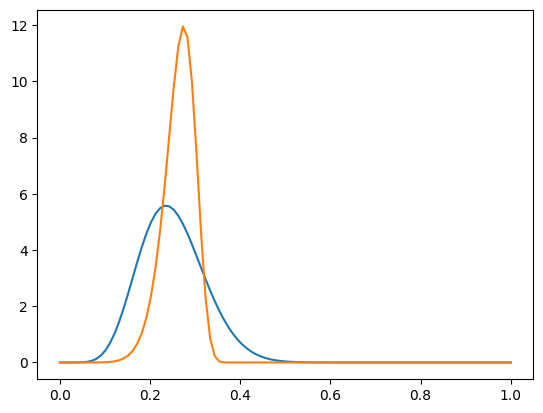

In [5]:
vis(9,27,1e5)

In [6]:
import functools 

def solve_ab(a,b):
    f = lambda c: objective(a,b,c=c)
    sol = optimize.minimize(f, x0=b, bounds = [(1,1e5),])
    return sol.x[0]

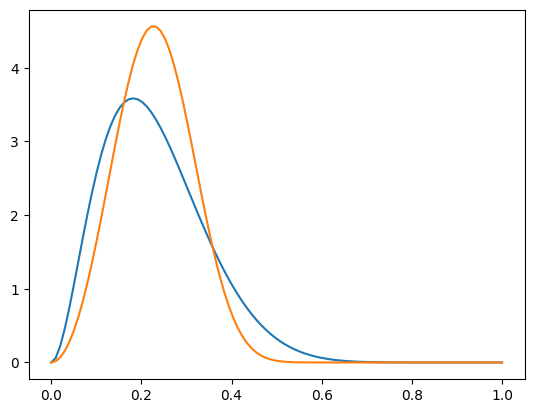

In [46]:
a,b = 3,10
vis(a,b,solve_ab(a,b))

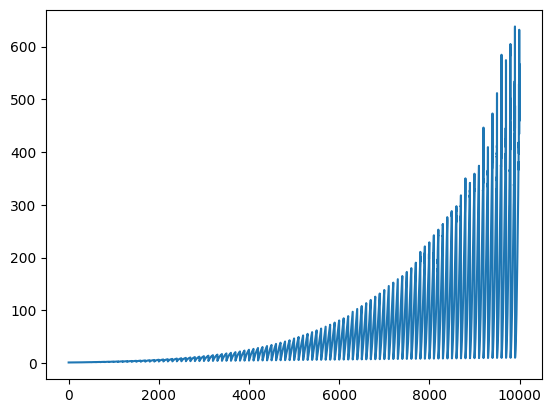

In [42]:
# build some training data 
a = np.linspace(1,10,100)
b = np.linspace(1,10,100)

X, Y = np.meshgrid(a,b)
x_train = np.vstack([X.ravel(), Y.ravel()]).T
y_train = [solve_ab(*p) for p in x_train]
plt.plot(y_train)

In [43]:
# lets fit some polynomial to these samples
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso 

poly = PolynomialFeatures(degree=2)
X_t = poly.fit_transform(x_train)

# add some log features also 
x_train_log = np.log(x_train)
log_interactions = np.expand_dims(np.log(x_train[:,0]*x_train[:,1]), -1)

X_t = np.hstack((X_t, x_train_log, log_interactions),)
X_t.shape

(10000, 9)

In [48]:
clf = LinearRegression(fit_intercept=False)
clf.fit(X_t, y_train)
print(clf.coef_)

[ 163.58064976  -15.93964671 -103.01313472    0.17035614    5.5631953
    6.48570112  -43.69488008   71.44572729   27.7508472 ]


2.302585092994046